# S03 T01: Graphic visualization of a dataset

### Exercise 1

*Graphically summarize the data set DelayedFlights.csv*

*Create at least one view by:* 

* A categorical variable (UniqueCarrier)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fpath = "DelayedFlights.csv/DelayedFlights.csv"
df = pd.read_csv(fpath)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [39]:
# Calculate Percentage
df_percent = df.groupby(['UniqueCarrier'])['UniqueCarrier'].count().reset_index(name="TotalCarrier")

df_percent.head()

,UniqueCarrier,TotalCarrier
0,9E,51885
1,AA,191865
2,AQ,750
3,AS,39293
4,B6,55315


In [15]:
df_percent = df_percent.assign(CarrierPercentage = lambda x: (x['TotalCarrier'] / x['TotalCarrier'].sum() * 100))
df_percent

,UniqueCarrier,TotalCarrier,CarrierPercentage
0,9E,51885,2.678961
1,AA,191865,9.906504
2,AQ,750,0.038725
3,AS,39293,2.028803
4,B6,55315,2.856062
5,CO,100195,5.173336
6,DL,114238,5.898414
7,EV,81877,4.227529
8,F9,28269,1.459604
9,FL,71284,3.680584


In [13]:
df_percent['TotalCarrier'].sum()

1936758

I was taking a different approach, but found a better and faster way to plot the percentage

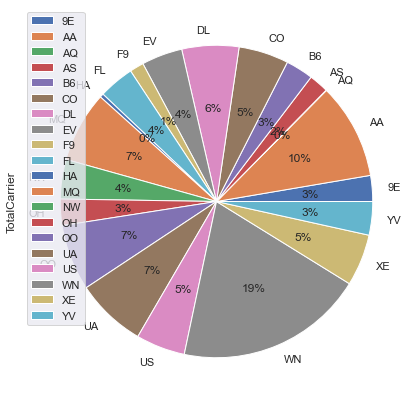

In [90]:
df_percent.groupby(['UniqueCarrier']).sum().plot(
    kind='pie', y='TotalCarrier', autopct='%1.0f%%', figsize=(7, 9))
plt.savefig('plots/pie.png')

* A numeric variable (ArrDelay)

In [20]:
df["ArrDelay"]

0         -14.0
1           2.0
2          14.0
3          34.0
4          11.0
           ... 
1936753    25.0
1936754    75.0
1936755    99.0
1936756     9.0
1936757    -5.0
Name: ArrDelay, Length: 1936758, dtype: float64

In [34]:
df["UniqueCarrier"]

0          WN
1          WN
2          WN
3          WN
4          WN
           ..
1936753    DL
1936754    DL
1936755    DL
1936756    DL
1936757    DL
Name: UniqueCarrier, Length: 1936758, dtype: object

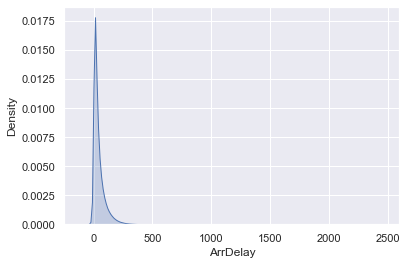

In [93]:
sns.set(style="darkgrid")

sns.kdeplot(df['ArrDelay'], shade=True)
plt.savefig('plots/numVariable.png')
plt.show()

* A numerical variable and a categorical variable (ArrDelay and UniqueCarrier)

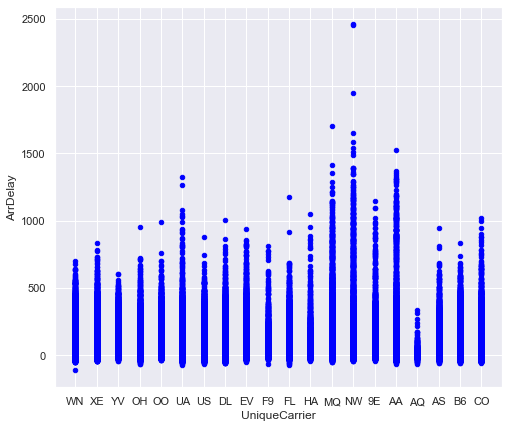

In [94]:
df.plot(x="UniqueCarrier", y='ArrDelay', kind = 'scatter', color = 'blue', figsize=(8, 7))
plt.savefig('plots/numAndCat.png')
plt.show()

* Two numeric variables (ArrDelay and DepDelay)

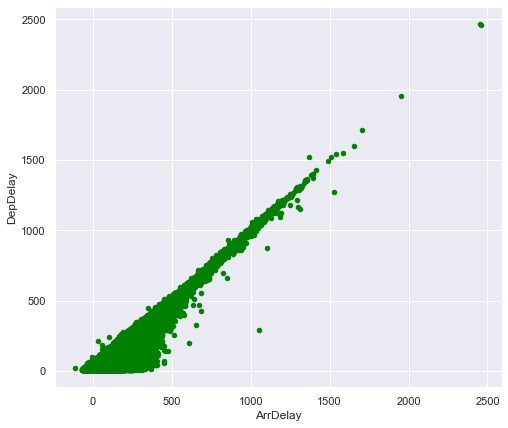

In [95]:
df.plot(x ='ArrDelay', y='DepDelay', kind = 'scatter', color = 'green', figsize=(8, 7))
plt.savefig('plots/twoNum.png')
plt.show()

* Three variables (ArrDelay, DepDelay and UniqueCarrier)

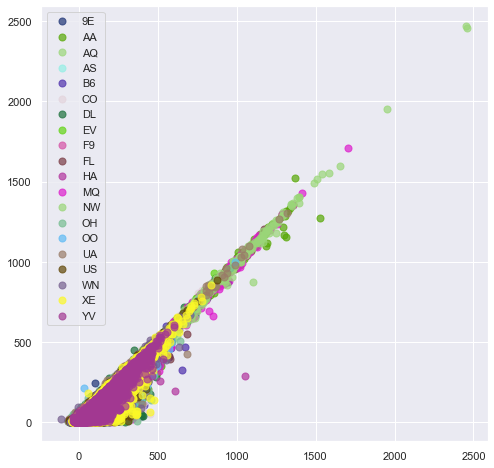

In [96]:
import numpy as np
import random

ARRDELAY = df["ArrDelay"].values
DEPDELAY = df["DepDelay"].values

CARRIERS = df["UniqueCarrier"].values
CARRIERS_ = np.unique(CARRIERS)

no_of_colors=20
COLORS=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]

fig, ax = plt.subplots(figsize=(8,8))
for UniqueCarrier, color in zip(CARRIERS_, COLORS):
    idxs = np.where(CARRIERS == UniqueCarrier)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        ARRDELAY[idxs], DEPDELAY[idxs], label=UniqueCarrier,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();
plt.savefig('plots/threeVariables.png')

* More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).

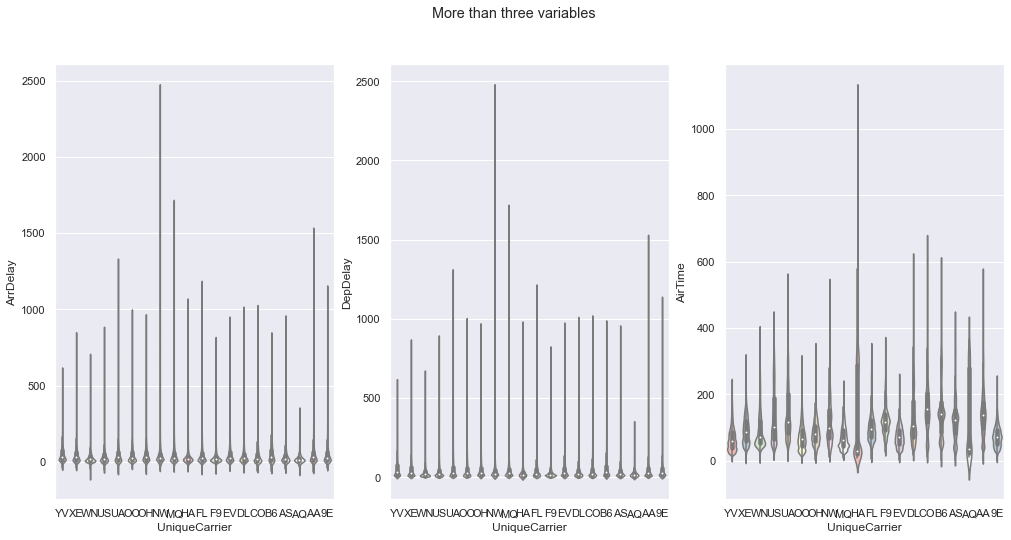

In [97]:
df_two = df[['UniqueCarrier', 'ArrDelay', 'DepDelay', 'AirTime']]
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(17,8))
# Using pandas methods and slicing to determine the order by decreasing median
my_order1 = df_two.groupby(by=["UniqueCarrier"])["ArrDelay"].median().iloc[::-1].index
my_order2 = df_two.groupby(by=["UniqueCarrier"])["DepDelay"].median().iloc[::-1].index
my_order3 = df_two.groupby(by=["UniqueCarrier"])["AirTime"].median().iloc[::-1].index
 
# Specifying the 'order' parameter with my_order and plotting
sns.violinplot(x='UniqueCarrier', y='ArrDelay', data=df_two, order=my_order1, palette="Pastel1", ax=axs[0])
sns.violinplot(x='UniqueCarrier', y='DepDelay', data=df_two, order=my_order2, palette="Pastel1", ax=axs[1])
sns.violinplot(x='UniqueCarrier', y='AirTime', data=df_two, order=my_order3, palette="Pastel1", ax=axs[2])
fig.suptitle('More than three variables')
plt.savefig('plots/fourVariables.png')
plt.show()

### Exercise 2

*Export charts as images or html.*

Done with plt.savefig('plots/x.png')

### Exercise 3

*Integrate graphical visualizations, in Task 5, sprint 2.*

In [114]:
df['AvgSpeed'] = df.apply(lambda row: row.Distance / row.ActualElapsedTime, axis=1)
df['Delayed'] = np.where(df['ArrDelay']>0, True, False)

df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgSpeed,Delayed
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,6.328125,False
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,6.328125,True
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,5.364583,True
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0,N,0,2.0,0.0,0.0,0.0,32.0,5.722222,True
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,0,N,0,NaN,NaN,NaN,NaN,NaN,6.811881,True


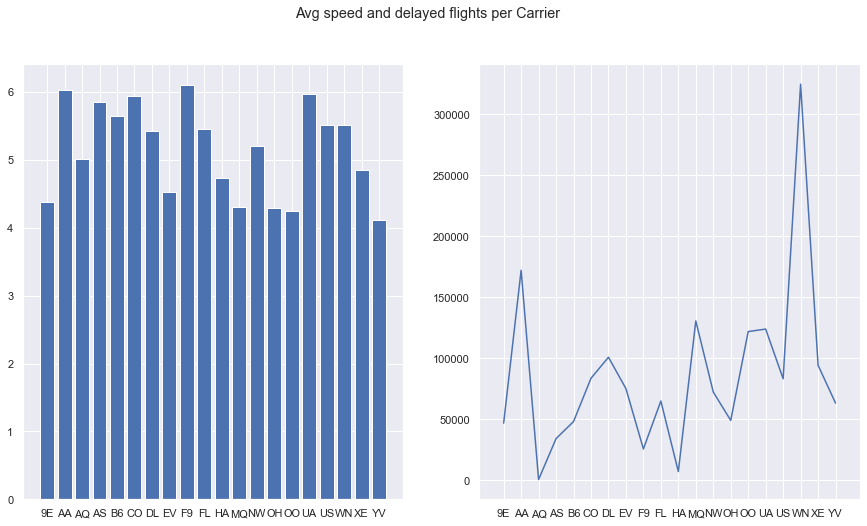

In [116]:
AVGSPEED = df.groupby(["UniqueCarrier"])["AvgSpeed"].mean()
DELAYED = df.groupby(['UniqueCarrier'])[['Delayed']].sum().values
LONGESTFLIGHTS = df.groupby(["UniqueCarrier"])["ActualElapsedTime"].mean()

CARRIERS = df["UniqueCarrier"].values
CARRIERS_ = np.unique(CARRIERS)

fig, axs = plt.subplots(1, 3, figsize=(15, 8), sharex=True, sharey=False)
axs[0].bar(CARRIERS_, AVGSPEED)
axs[1].plot(CARRIERS_, DELAYED)
axs[2].plot(CARRIERS_, LONGESTFLIGHTS)
fig.suptitle('Avg speed and delayed flights per Carrier')
plt.savefig('plots/avgSpeedandDelayed.png')